In [24]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
def normalize(arr, t_min, t_max):
    diff_arr = max(arr) - min(arr)
    diff_fact = (t_max - t_min)/diff_arr
    minArr = min(arr)
    arr -= minArr
    arr *= diff_fact
    arr += t_min


In [26]:
def get_fp_tp(actual, pred, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i in range(len(actual)):
        if actual[i] == 1:
            if pred[i] > threshold:
                tp += 1
            else:
                fn += 1
        else:
            if pred[i] > threshold:
                fp += 1
            else:
                tn += 1

    return tp/(tp+fn), fp/(fp+tn)


In [27]:
# Data load and normalization
label = np.load('data-ques-1/label.npy')
score1 = np.load('data-ques-1/score.npy')
score2 = np.load('data-ques-1/score1.npy')
normalize(score1, 0, 1)
normalize(score2, 0, 1)


In [28]:
# Calculating FPR,TPR point in deiffernt thresolds for both models
fpr1 = []
tpr1 = []
fpr2 = []
tpr2 = []
thsld = np.linspace(1, 0, num=20)
for i in thsld:
    tp, fp = get_fp_tp(label, score1, i)
    fpr1.append(fp)
    tpr1.append(tp)
    tp2, fp2 = get_fp_tp(label, score2, i)
    fpr2.append(fp2)
    tpr2.append(tp2)


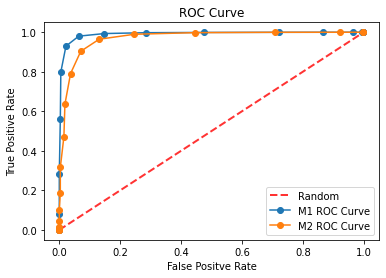

In [29]:
# Plotting ROC curve for both models
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2,
         color='r', label='Random', alpha=.8)
plt.plot(fpr1, tpr1, label="M1 ROC Curve", marker='o')
plt.plot(fpr2, tpr2, label="M2 ROC Curve", marker='o')
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [30]:
# AUC calculation for both models
aucM1 = np.trapz(tpr1, fpr1)
aucM2 = np.trapz(tpr2, fpr2)
print("Area Under the curve for M1 : {}".format(aucM1))
print("Area Under the curve for M2 : {}".format(aucM2))


Area Under the curve for M1 : 0.9894237454500838
Area Under the curve for M2 : 0.9681889933184838


In [31]:
# Calculate true positive rate for both models when false acceptance rate is 10%
tpr1At10 = np.interp(0.1, fpr1, tpr1)
tpr2At10 = np.interp(0.1, fpr2, tpr2)
print("When false acceptance rate is 10% , true positive rate for M1 : {}".format(tpr1At10))
print("When false acceptance rate is 10% , true positive rate for M2 : {}".format(tpr2At10))


When false acceptance rate is 10% , true positive rate for M1 : 0.9858447507259417
When false acceptance rate is 10% , true positive rate for M2 : 0.9334093356781591


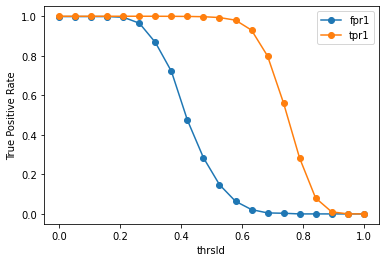

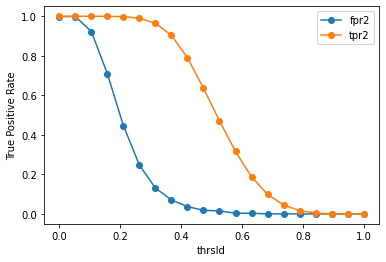

In [32]:
# TRP/FRP with thresold
plt.plot(thsld, fpr1, label="fpr1", marker='o')
plt.plot(thsld, tpr1, label="tpr1", marker='o')
plt.xlabel("thrsld")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
plt.plot(thsld, fpr2, label="fpr2", marker='o')
plt.plot(thsld, tpr2, label="tpr2", marker='o')
plt.xlabel("thrsld")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
